<a href="https://colab.research.google.com/github/rutuja-patil24/CMPE-258-Deep_Learning/blob/main/Assignment_02/Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wandb -qq

In [ ]:
!pip install wandb --upgrade  # Upgrade wandb to the latest version

In [ ]:
!pip install tensorflow --upgrade

In [ ]:
!pip install tensorflow==2.12.0

INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 52.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 70.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 76.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 MB 11.5 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninst

wandb: Currently logged in as: rutujapatil241997 (rutujapatil241997-san-jose-state-university) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 128)          1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,378,945
Non-trainable params: 0
_________________________________________________________________


wandb: WARNING WandbCallback is deprecated and will be removed in a future release. Please use the WandbMetricsLogger, WandbModelCheckpoint, and WandbEvalCallback callbacks instead. See https://docs.wandb.ai/guides/integrations/keras for more information.
wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/10
313/313 [==============================] - ETA: 0s - loss: 0.4648 - accuracy: 0.7721

wandb: Adding directory to artifact (/content/wandb/run-20250219_214612-bcy1fwho/files/model-best)... Done. 0.1s


313/313 [==============================] - 159s 494ms/step - loss: 0.4648 - accuracy: 0.7721 - val_loss: 0.3225 - val_accuracy: 0.8680
Epoch 2/10
313/313 [==============================] - ETA: 0s - loss: 0.2526 - accuracy: 0.9027

wandb: Adding directory to artifact (/content/wandb/run-20250219_214612-bcy1fwho/files/model-best)... Done. 0.1s


313/313 [==============================] - 151s 484ms/step - loss: 0.2526 - accuracy: 0.9027 - val_loss: 0.3021 - val_accuracy: 0.8770
Epoch 3/10
313/313 [==============================] - 137s 436ms/step - loss: 0.1783 - accuracy: 0.9356 - val_loss: 0.3445 - val_accuracy: 0.8678
Epoch 4/10
313/313 [==============================] - 139s 443ms/step - loss: 0.1494 - accuracy: 0.9467 - val_loss: 0.3717 - val_accuracy: 0.8502
Epoch 5/10
782/782 [==============================] - 40s 51ms/step - loss: 0.4909 - accuracy: 0.8479
Test Accuracy: 0.8479200005531311
782/782 [==============================] - 40s 50ms/step
              precision    recall  f1-score   support

           0       0.83      0.88      0.85     12500
           1       0.87      0.82      0.84     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000



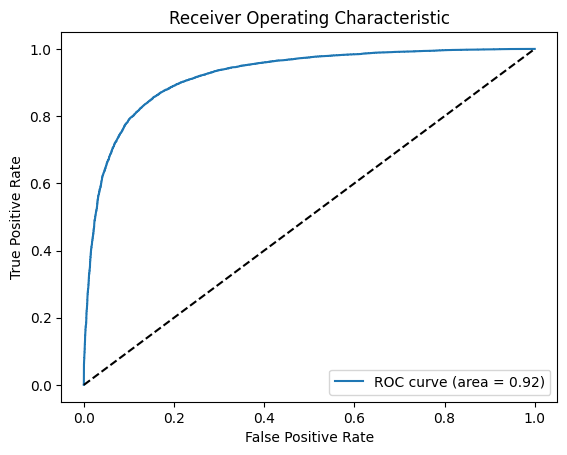

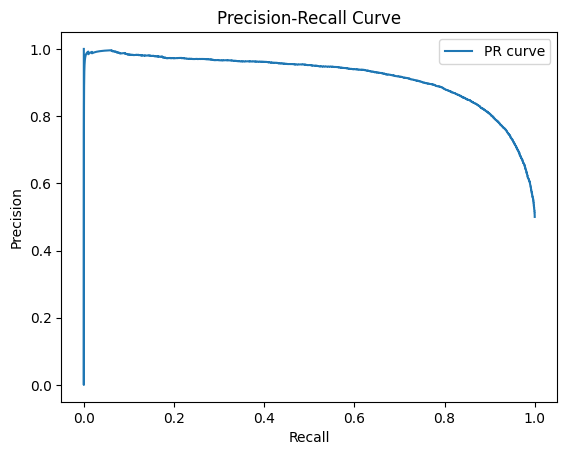

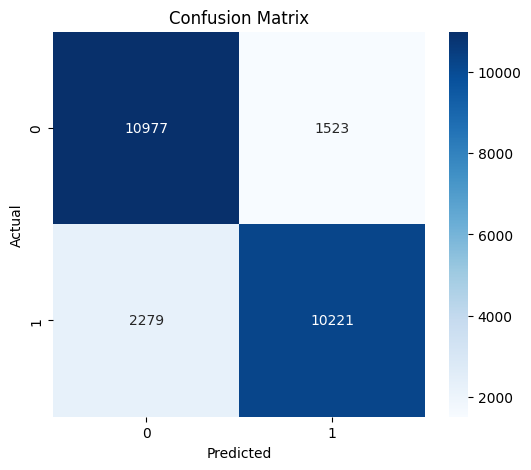

False Positives: 146800000
False Negatives: 165700000


accuracy,▁▆▇▇█
epoch,▁▃▅▆█
loss,█▄▂▂▁
val_accuracy,▆█▆▁▃
val_loss,▂▁▃▄█
accuracy,0.96615
best_epoch,1
best_val_loss,0.3021
epoch,4
loss,0.10075
val_accuracy,0.8578


In [ ]:
# IMDB Sentiment Analysis with LSTM and WandB Integration

# 1. Import Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import imdb
from sklearn.metrics import classification_report, roc_curve, auc, precision_recall_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import wandb
from wandb.integration.keras import WandbCallback


# 2. Initialize WandB
wandb.init(project="IMDB-Sentiment-Analysis")

# 3. Load and Preprocess IMDB Dataset
vocab_size = 10000
maxlen = 200

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

# 4. Build the LSTM Model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=maxlen),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


# 5. Train the Model
early_stop = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop, WandbCallback()]  # Use WandbCallback here
)

# 6. Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

# Predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# 7. Metrics
print(classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(recall, precision, label='PR curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 8. Error Analysis
false_positives = np.where((y_pred == 1) & (y_test == 0))[0]
false_negatives = np.where((y_pred == 0) & (y_test == 1))[0]

print(f"False Positives: {len(false_positives)}")
print(f"False Negatives: {len(false_negatives)}")

# Save Model
model.save("imdb_sentiment_lstm.h5")

# Finish WandB Run
wandb.finish()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 200, 128)          1280000   
                                                                 
 bidirectional_2 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,378,945
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
313/313 [==============================] - ETA: 0s - loss: 0.4380 - accuracy: 0.7948

wandb: Adding directory to artifact (/content/wandb/run-20250219_222859-uwaj4s3h/files/model-best)... Done. 0.1s


313/313 [==============================] - 164s 510ms/step - loss: 0.4380 - accuracy: 0.7948 - val_loss: 0.3226 - val_accuracy: 0.8662
Epoch 2/10
313/313 [==============================] - ETA: 0s - loss: 0.2518 - accuracy: 0.9021

wandb: Adding directory to artifact (/content/wandb/run-20250219_222859-uwaj4s3h/files/model-best)... Done. 0.1s


313/313 [==============================] - 155s 496ms/step - loss: 0.2518 - accuracy: 0.9021 - val_loss: 0.3039 - val_accuracy: 0.8736
Epoch 3/10
313/313 [==============================] - 138s 442ms/step - loss: 0.1813 - accuracy: 0.9345 - val_loss: 0.3269 - val_accuracy: 0.8716
Epoch 4/10
313/313 [==============================] - 142s 455ms/step - loss: 0.1358 - accuracy: 0.9526 - val_loss: 0.3729 - val_accuracy: 0.8734
Epoch 5/10
782/782 [==============================] - 44s 56ms/step - loss: 0.3183 - accuracy: 0.8680
Test Accuracy: 0.8680400252342224
782/782 [==============================] - 43s 53ms/step
              precision    recall  f1-score   support

           0       0.89      0.84      0.86     12500
           1       0.85      0.90      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000



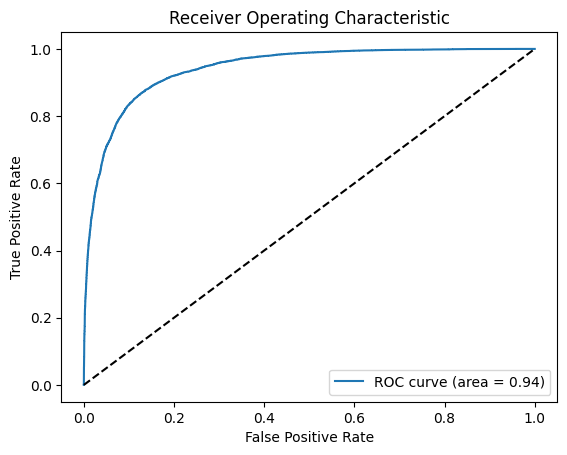

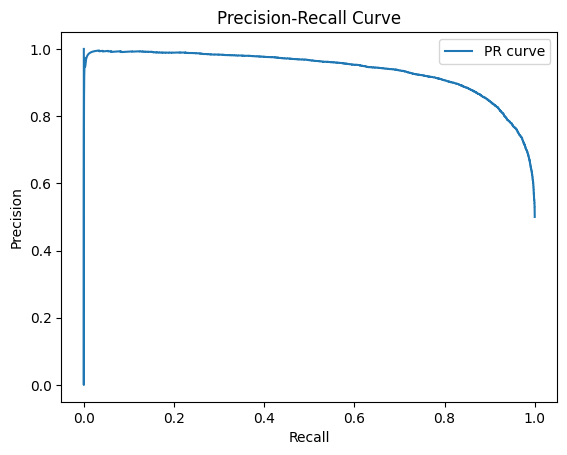

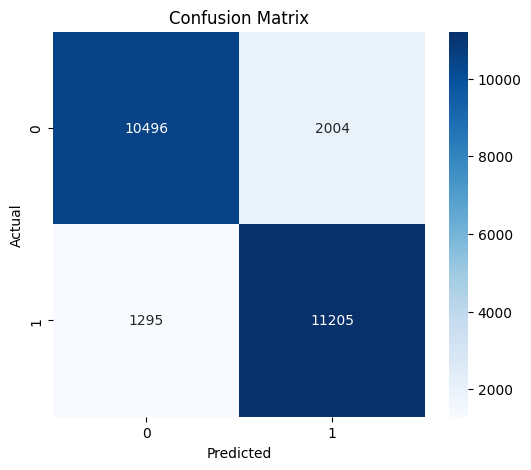

False Positives: 2004
False Negatives: 1295

False Positive Examples:
Review ID: 8, Predicted: 1, Actual: 0
Review ID: 17, Predicted: 1, Actual: 0
Review ID: 66, Predicted: 1, Actual: 0
Review ID: 75, Predicted: 1, Actual: 0
Review ID: 112, Predicted: 1, Actual: 0

False Negative Examples:
Review ID: 45, Predicted: 0, Actual: 1
Review ID: 55, Predicted: 0, Actual: 1
Review ID: 80, Predicted: 0, Actual: 1
Review ID: 100, Predicted: 0, Actual: 1
Review ID: 101, Predicted: 0, Actual: 1


accuracy,▁▅▇██
epoch,▁▃▅▆█
loss,█▄▃▂▁
val_accuracy,▆█▇█▁
val_loss,▂▁▂▄█
accuracy,0.9626
best_epoch,1
best_val_loss,0.30392
epoch,4
loss,0.10978
val_accuracy,0.8492


In [ ]:
# IMDB Sentiment Analysis with LSTM and WandB Integration

# 1. Import Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.datasets import imdb
from sklearn.metrics import classification_report, roc_curve, auc, precision_recall_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import wandb
from wandb.integration.keras import WandbCallback

# 2. Initialize WandB
wandb.init(project="IMDB-Sentiment-Analysis")

# 3. Load and Preprocess IMDB Dataset
vocab_size = 10000
maxlen = 200

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

# 4. Build the LSTM Model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=128, input_length=maxlen),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# 5. Compile the Model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# 6. Define Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=3)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)

# 7. Train the Model
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop, model_checkpoint, WandbCallback()]
)

# 8. Evaluate the Model
model.load_weights('best_model.h5')
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

# 9. Predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob.flatten() > 0.5).astype(int)

# 10. Metrics
print(classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(recall, precision, label='PR curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 11. Corrected Error Analysis
# Identify misclassified examples
false_positives = np.where((y_pred == 1) & (y_test == 0))[0]
false_negatives = np.where((y_pred == 0) & (y_test == 1))[0]

# Count misclassifications
print(f"False Positives: {len(false_positives)}")
print(f"False Negatives: {len(false_negatives)}")

# Display unique misclassified examples
print("\nFalse Positive Examples:")
for i in false_positives[:5]:
    print(f"Review ID: {i}, Predicted: {y_pred[i]}, Actual: {y_test[i]}")

print("\nFalse Negative Examples:")
for i in false_negatives[:5]:
    print(f"Review ID: {i}, Predicted: {y_pred[i]}, Actual: {y_test[i]}")

# 12. Save Model
model.save("imdb_sentiment_lstm_final.h5")

# Finish WandB Run
wandb.finish()
